In [1]:
import pandas as pd
import numpy as np


In [2]:
import os, glob

In [3]:
cd "/data/users/noahkleinschmidt/EcoTyper/results"

/data/users/noahkleinschmidt/EcoTyper/results


In [4]:
from eco_validate.core import *

In [5]:
dirs = [ "drop_hepato", "drop_hepato_run2", "drop_hepato_run3", "drop_hepato_run2_30", "drop_hepato_run3_30" ]
collection = CellStateCollection( dirs )

In [6]:
genes = {}
for cell_type in collection:

    df = pd.DataFrame()
    files = ( find_files( i, "gene_info.txt" ) for i in collection.cell_types[ cell_type ] )
    for file in files:
        name = os.path.basename( os.path.dirname( os.path.dirname( file[0] ) ) )
        new = pd.read_csv( file[0], sep = "\t", index_col = 0 )
        new["run"] = name
        new = new[ ["State", "MaxFC", "run"] ]
        if df.empty:
            df = new
        else:
            df = pd.concat( [df, new], axis = 0 )
    genes[ cell_type ] = df

In [7]:
df.loc["ARVCF",:]

,State,MaxFC,run
ARVCF,S09,0.529781,drop_hepato
ARVCF,S09,0.529781,drop_hepato_run2
ARVCF,S09,0.529781,drop_hepato_run3
ARVCF,S03,0.891130,drop_hepato_run2_30
ARVCF,S03,0.891130,drop_hepato_run3_30


In [8]:
collection.get_genes()

,cell_type,overlap,total
drop_hepato,Cholangiocytes,977,978
drop_hepato_run2,Cholangiocytes,977,978
drop_hepato_run2_30,Cholangiocytes,974,978
drop_hepato_run3,Cholangiocytes,977,978
drop_hepato_run3_30,Cholangiocytes,974,978
drop_hepato,Hepatic_stellate_cells,957,1243
drop_hepato_run2,Hepatic_stellate_cells,957,1243
drop_hepato_run2_30,Hepatic_stellate_cells,982,1243
drop_hepato_run3,Hepatic_stellate_cells,957,1243
drop_hepato_run3_30,Hepatic_stellate_cells,982,1243


In [9]:
"""
This entire code does not work because we forgot that state S01 from different runs do NOT neessarily correspond to each other. The labelling is arbitrary so S01 from a could be S02 from b.
And this code here strictly groups by states!
"""
# class CellStateOverlaps:
#     """
#     A class to handle the overlap between different cell states and separate Ecotyper runs for a single cell type.

#     Parameters
#     ----------
#     cell_type_state_assignments : dict
#         A dictionary with one key (cell type) and a pandas dataframe with a genes as index, 
#         a "State" column specifying the state to which the gene was assigned, and a "run" 
#         column specifying which Ecotyper run the assignment is from.
#     """
#     def __init__(self, cell_type_state_assignments : dict ):

#         if len( cell_type_state_assignments ) > 1:
#             raise ValueError( "Only one cell type allowed" )

#         self.cell_type = list( cell_type_state_assignments.keys() )[0]
#         self._df = cell_type_state_assignments[ self.cell_type ]

#         self.overlaps = None

#         self._compute_total()

#     def _compute_total( self ):
#         """
#         Compute the total set of unique genes.
#         """
#         self.total = set( self._df.index )

#     def compare_runs_per_state( self, percent : bool = False ):
#         """
#         Compute the overlap between between separate EcoTyper runs for each cell state individually.

#         Parameters
#         ----------
#         percent : bool
#             If True, compute the overlap as a percentage of the total set of genes per state.
#         """

#         final = pd.DataFrame()
#         for state,df in self._df.groupby( "State" ):

#             total = set( df.index )

#             for run, subset in df.groupby( "run" ):
                
#                 overlap = GeneSetOverlap( total, set( subset.index ) )

#                 subset = overlap.get( percent = percent )
#                 subset.insert(0, "run", run )
#                 subset.index = [ state ]

#                 if final.empty:
#                     final = subset
#                 else:
#                     final = pd.concat( [final, subset], axis = 0 )

#         return final 

#                 # if df.empty:
#                 #     df = subset
#                 # else:
#                 #     df = pd.concat( [df, subset], axis = 0 )
#         # shape = ( len( self._df.State.unique() ), len( self._df.run.unique() ) )
#         # overlaps = np.zeros( shape = shape )

#         # idx = 0
#         # for state,df in self._df.groupby( "State" ):
            
#         #     total = set( df.index )
#         #     jdx = 0
#         #     for run, subset in df.groupby( "run" ):
#         #         overlap = GeneSetOverlap( total, set( subset.index ) )
#         #         overlaps[ idx, jdx ] = len( overlap )
#         #         jdx += 1
#         #     idx += 1
        
#         # cols = list( self._df.run.unique() ) + ["total"]
#         # overlaps = pd.DataFrame( overlaps, index = self._df.State.unique(), columns = cols )
#         # self.overlaps = overlaps
#         # return overlaps

class BaseOverlap:
    """
    This class handles a single overlap between two sets of genes.
    """
    def __init__( self, a : set, b : set ):
        self.a = a
        self.b = b
        self.overlap = a.intersection( b )
        self.total = len( a.union( b ) )
        self.overlap_percent = len( self.overlap ) / self.total

    def get( self, percent : bool = False ):
        """
        Get a pandas dataframe of the overlaps between the two sets, either in percentages
        or in absolute counts (in which case a "total" column is added).

        Parameters
        ----------
        percent : bool
            If True, return the overlap in percentages.
        """
        if percent:
            return pd.DataFrame( { "overlap" : [self.overlap_percent] }  )
        else:
            return pd.DataFrame( { "overlap" : [len(self)], "total" : [self.total] } )

    def __len__( self ):
        return len( self.overlap )

    def __add__( self, other ):
        return GeneSetOverlap( self.a.union( other.a ), self.b.union( other.b ) )

# def gene_set_overlap( self, percent : bool = False ):
#     """
#     Compute the gene set overlap between different runs for each cell type between and cell state.

#     Parameters
#     ----------
#     percent : bool
#         If True, compute the overlap as a percentage of the total set of genes per state.
#     """
#     gene_sets = {}
#     for cell_type in self.genes:
#         overlap = CellStateOverlaps( { cell_type : self.genes[ cell_type ] } )
#         gene_sets[ cell_type ] = overlap.compare_runs_per_state( percent = percent )

#     final = list( gene_sets.values() )
#     for cell_type,i in zip( self.genes, final):
#         i.insert( 0, "cell_type", cell_type) 
#     final = pd.concat( final, axis = 0 )
#     print( final )
#     return gene_sets

# gene_set_overlap( collection )

In [10]:
"""
This code here ONLY groups per runs and cell types and looks at the gene sets from ALL cell states.
"""

class GeneSetOverlap:
    """
    A class to handle the overlap between different cell states and separate Ecotyper runs for a single cell type.

    Parameters
    ----------
    cell_type : str 
        The cell type label.
    
    state_assignments : dict
        A pandas dataframe with a genes as index, a "State" column specifying the state to which the gene was assigned, and a "run" column specifying which Ecotyper run the assignment is from.
    """
    def __init__( self, cell_type : str, state_assignments : pd.DataFrame ):
        self.cell_type = cell_type
        self.state_assignments = state_assignments

    def compute_overlap( self, percent : bool = False ):
        """
        Compute the overlap between between separate Ecotyper runs for each cell state individually.

        Parameters
        ----------
        percent : bool
            If True, compute the overlap as a percentage of the total set of genes per state.
        """
        final = []
        total = set( self.state_assignments.index )
        for run, subset in self.state_assignments.groupby( "run" ):
            
            overlap = BaseOverlap( total, set( subset.index ) )
            subset = overlap.get( percent = percent )
            subset.index = [run]

            final += [subset]

        final = pd.concat( final, axis = 0 )
        final.insert( 0, "cell_type", self.cell_type )
        return final

def compare_gene_overlaps( self, percent : bool = False ):
    """
    Compares the gene set overlaps between differen EcoTyper runs over per cell type for all cell states.

    Note
    ----
    A per-state comparison makes no sense because the state labelling is arbitrary for each clustering and therefore 
    S01 from two different runs need not correspond to the same state.

    Parameters
    ----------
    percent : bool
        If True, compute the overlap as a percentage of the total set of genes per state.
    """
    gene_sets = []

    for cell_type,overlap in _get_gene_overlaps( self ).items():

        overlap = overlap.compute_overlap( percent = percent ) 
        gene_sets += [overlap]
    
    gene_sets = pd.concat( gene_sets, axis = 0 )
    return gene_sets

def _get_gene_overlaps( self ):
    """
    Generate GeneSetOverlaps for each cell type.
    """
    gene_sets = {}
    for cell_type in self.genes:
        overlap = GeneSetOverlap( cell_type, self.genes[ cell_type ] )
        gene_sets[ cell_type ] = overlap
    return gene_sets


gene_overlaps = compare_gene_overlaps( collection, percent = True )
gene_overlaps


,cell_type,overlap
drop_hepato,Cholangiocytes,0.998978
drop_hepato_run2,Cholangiocytes,0.998978
drop_hepato_run2_30,Cholangiocytes,0.995910
drop_hepato_run3,Cholangiocytes,0.998978
drop_hepato_run3_30,Cholangiocytes,0.995910
drop_hepato,Hepatic_stellate_cells,0.769912
drop_hepato_run2,Hepatic_stellate_cells,0.769912
drop_hepato_run2_30,Hepatic_stellate_cells,0.790024
drop_hepato_run3,Hepatic_stellate_cells,0.769912
drop_hepato_run3_30,Hepatic_stellate_cells,0.790024


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
_gene_overlaps = gene_overlaps.reset_index()
_gene_overlaps = _gene_overlaps.rename( columns = {"index" : "run"} )

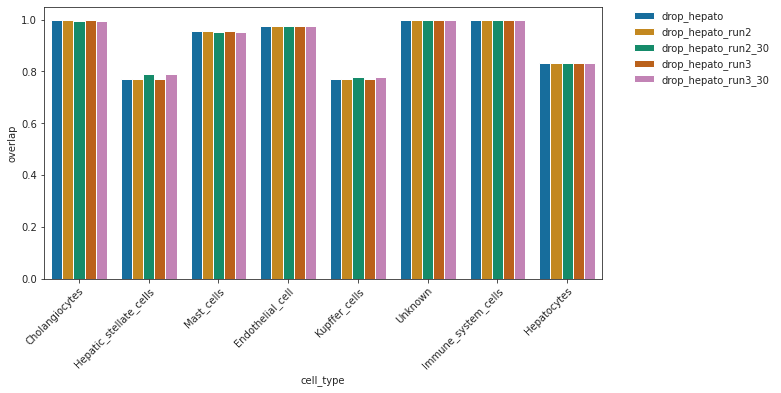

In [12]:
sns.set_style( "ticks" )
sns.set_palette( "colorblind" )
fig, ax = plt.subplots( figsize = (10, 5) ) 
sns.barplot( x = "cell_type", y = "overlap", hue = "run", data = _gene_overlaps, ax = ax )
_ = ax.set_xticklabels( ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor' )
ax.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon = False )